In [ ]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# Load Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the data

x_train = x_train / 255.0

x_test = x_test / 255.0

In [ ]:
# Class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',

               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Build the model

model = keras.Sequential([

    layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    layers.Conv2D(32, (3, 3), activation='relu'),

    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7570 - loss: 0.6635 - val_accuracy: 0.8782 - val_loss: 0.3430
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8810 - loss: 0.3252 - val_accuracy: 0.8905 - val_loss: 0.3023
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9005 - loss: 0.2732 - val_accuracy: 0.8898 - val_loss: 0.3044
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9145 - loss: 0.2356 - val_accuracy: 0.8992 - val_loss: 0.2864
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9242 - loss: 0.2045 - val_accuracy: 0.9070 - val_loss: 0.2626
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9319 - loss: 0.1857 - val_accuracy: 0.9111 - val_loss: 0.2462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9400 - loss: 0.1633 - val_accuracy: 0.9095 - val_loss: 0.2566
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9461 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9084 - loss: 0.2897
Test accuracy: 0.9086


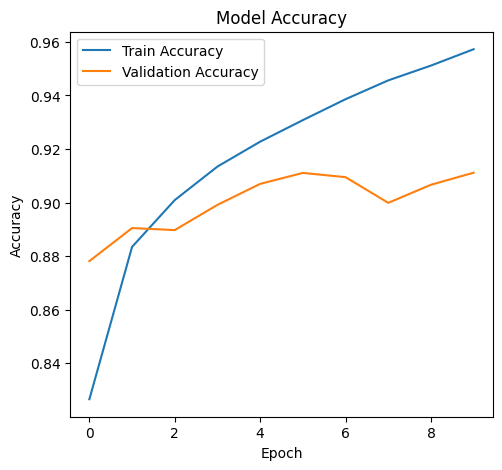

In [ ]:
# Plot training history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Train Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()


In [ ]:
# Predict on test images

predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


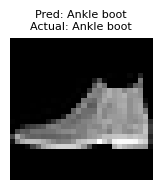

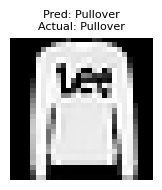

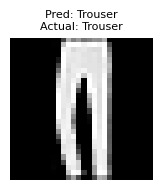

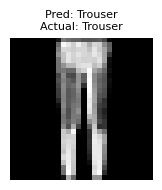

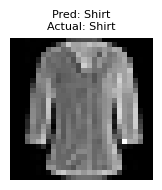

In [ ]:
# Show predictions for first 5 test images

for i in range(5):

    plt.figure(figsize=(2, 2))

    plt.imshow(x_test[i], cmap='gray')

    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i]]}", fontsize=8)

    plt.axis('off')

    plt.tight_layout()

    plt.show()